In [2]:
import pandas as pd
dat = pd.read_csv('socialgood.csv')
dat.info()
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subj_nr                                6300 non-null   float64
 1   group                                  6300 non-null   float64
 2   subj_group                             6300 non-null   float64
 3   block                                  6300 non-null   float64
 4   trial_nr                               6300 non-null   float64
 5   threat_cond                            6300 non-null   object 
 6   order                                  6300 non-null   float64
 7   contr                                  6294 non-null   float64
 8   active_contr                           6300 non-null   float64
 9   trials_total                           6300 non-null   float64
 10  contr_block_1                          519 non-null    float64
 11  cont

,subj_nr,group,subj_group,block,trial_nr,threat_cond,order,contr,active_contr,trials_total,...,real,shock_intens,mild_intens,identity,confidentiality,observed,motivation,prior_experience,prior_knowledge,knowing_eachother
0,1.0,10.0,1.0,1.0,1.0,safe,1.0,1.0,1.0,1.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
1,1.0,10.0,1.0,1.0,1.0,mild,3.0,1.0,1.0,21.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
2,1.0,10.0,1.0,1.0,1.0,threat,2.0,1.0,1.0,11.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
3,1.0,10.0,1.0,1.0,2.0,safe,1.0,1.0,1.0,2.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
4,1.0,10.0,1.0,1.0,2.0,mild,3.0,1.0,1.0,22.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN


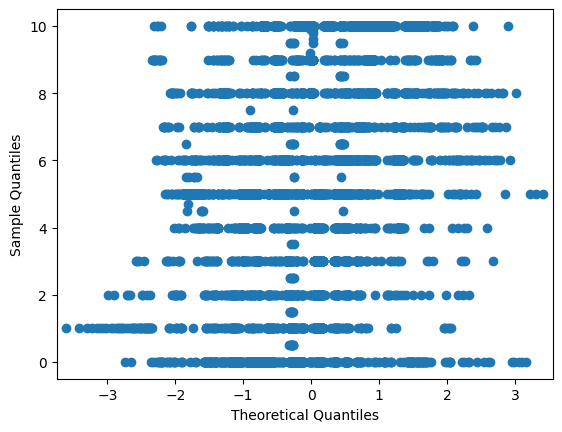

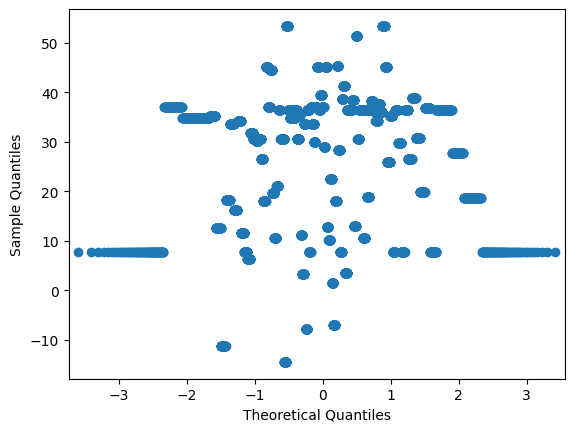

In [77]:
import statsmodels.api as sm
import pandas as pd
import pylab as py

data = pd.read_csv("socialgood.csv") 
data1 = pd.DataFrame (data, columns = ['contr'])
data2 = pd.DataFrame (data, columns = ['svo_angle'])

qq1= sm.qqplot(data1)
qq2 = sm.qqplot(data2)
py.show(qq1)
py.show(qq2)

# Box Cox Transformation


C:\Users\DELL\AppData\Local\Temp\ipykernel_9564\1570684139.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat.contr, hist=False, kde=True,
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9564\1570684139.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your c

Lambda value used for Transformation: 1.0566425201093157


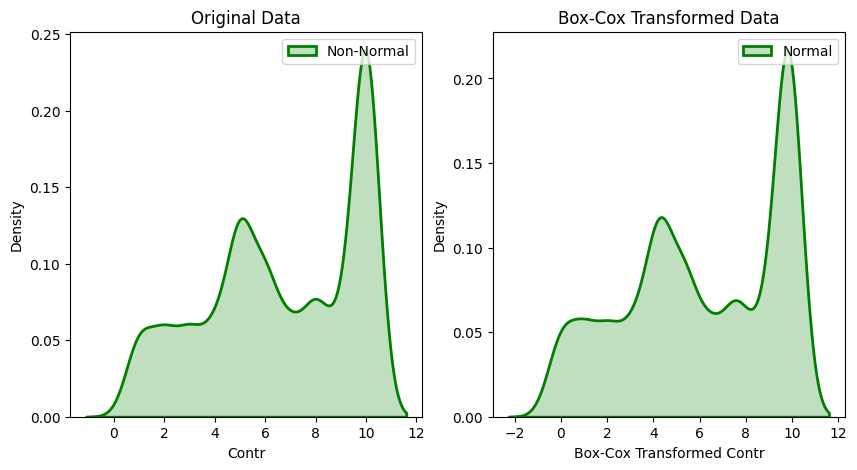

In [ ]:

# import modules
import numpy as np
from scipy import stats
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# load data
dat = pd.read_csv('socialgood.csv')

# select positive values of 'contr' and drop missing values
dat = dat.loc[dat['contr'] > 0].dropna(subset=['contr'])

# transform data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(dat.contr)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot original data (non-normal) and fitted data (normal)
sns.distplot(dat.contr, hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             label="Non-Normal", color="green", ax=ax[0])

sns.distplot(fitted_data, hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             label="Normal", color="green", ax=ax[1])

# add legends to the subplots
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

# add titles to the subplots
ax[0].set_title("Original Data")
ax[1].set_title("Box-Cox Transformed Data")

# add x and y axis labels
ax[0].set_xlabel("Contr")
ax[0].set_ylabel("Density")
ax[1].set_xlabel("Box-Cox Transformed Contr")
ax[1].set_ylabel("Density")

print(f"Lambda value used for Transformation: {fitted_lambda}")


In [ ]:
import pandas as pd
dat = pd.read_csv('socialgood.csv')
dat.info()
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subj_nr                                6300 non-null   float64
 1   group                                  6300 non-null   float64
 2   subj_group                             6300 non-null   float64
 3   block                                  6300 non-null   float64
 4   trial_nr                               6300 non-null   float64
 5   threat_cond                            6300 non-null   object 
 6   order                                  6300 non-null   float64
 7   contr                                  6294 non-null   float64
 8   active_contr                           6300 non-null   float64
 9   trials_total                           6300 non-null   float64
 10  contr_block_1                          519 non-null    float64
 11  cont

,subj_nr,group,subj_group,block,trial_nr,threat_cond,order,contr,active_contr,trials_total,...,real,shock_intens,mild_intens,identity,confidentiality,observed,motivation,prior_experience,prior_knowledge,knowing_eachother
0,1.0,10.0,1.0,1.0,1.0,safe,1.0,1.0,1.0,1.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
1,1.0,10.0,1.0,1.0,1.0,mild,3.0,1.0,1.0,21.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
2,1.0,10.0,1.0,1.0,1.0,threat,2.0,1.0,1.0,11.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
3,1.0,10.0,1.0,1.0,2.0,safe,1.0,1.0,1.0,2.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN
4,1.0,10.0,1.0,1.0,2.0,mild,3.0,1.0,1.0,22.0,...,5.0,4.0,2.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN


In [4]:
trial1= dat.loc[dat['trial_nr'] == 1.0]
print(trial1)
trial2= dat.loc[dat['trial_nr'] == 2.0]
print(trial2)
trial3= dat.loc[dat['trial_nr'] == 3.0]
print(trial3)

      subj_nr  group  subj_group  block  trial_nr threat_cond  order  contr  \
0         1.0   10.0         1.0    1.0       1.0        safe    1.0    1.0   
1         1.0   10.0         1.0    1.0       1.0        mild    3.0    1.0   
2         1.0   10.0         1.0    1.0       1.0      threat    2.0    1.0   
30        1.0   10.0         1.0    2.0       1.0        safe    4.0    3.0   
31        1.0   10.0         1.0    2.0       1.0        mild    5.0    1.0   
...       ...    ...         ...    ...       ...         ...    ...    ...   
6241    105.0   47.0         3.0    1.0       1.0        mild    1.0    6.0   
6242    105.0   47.0         3.0    1.0       1.0      threat    2.0    5.0   
6270    105.0   47.0         3.0    2.0       1.0        safe    4.0    4.0   
6271    105.0   47.0         3.0    2.0       1.0        mild    5.0    8.0   
6272    105.0   47.0         3.0    2.0       1.0      threat    6.0    0.0   

      active_contr  trials_total  ...  real  shock_

<AxesSubplot: xlabel='subj_nr'>

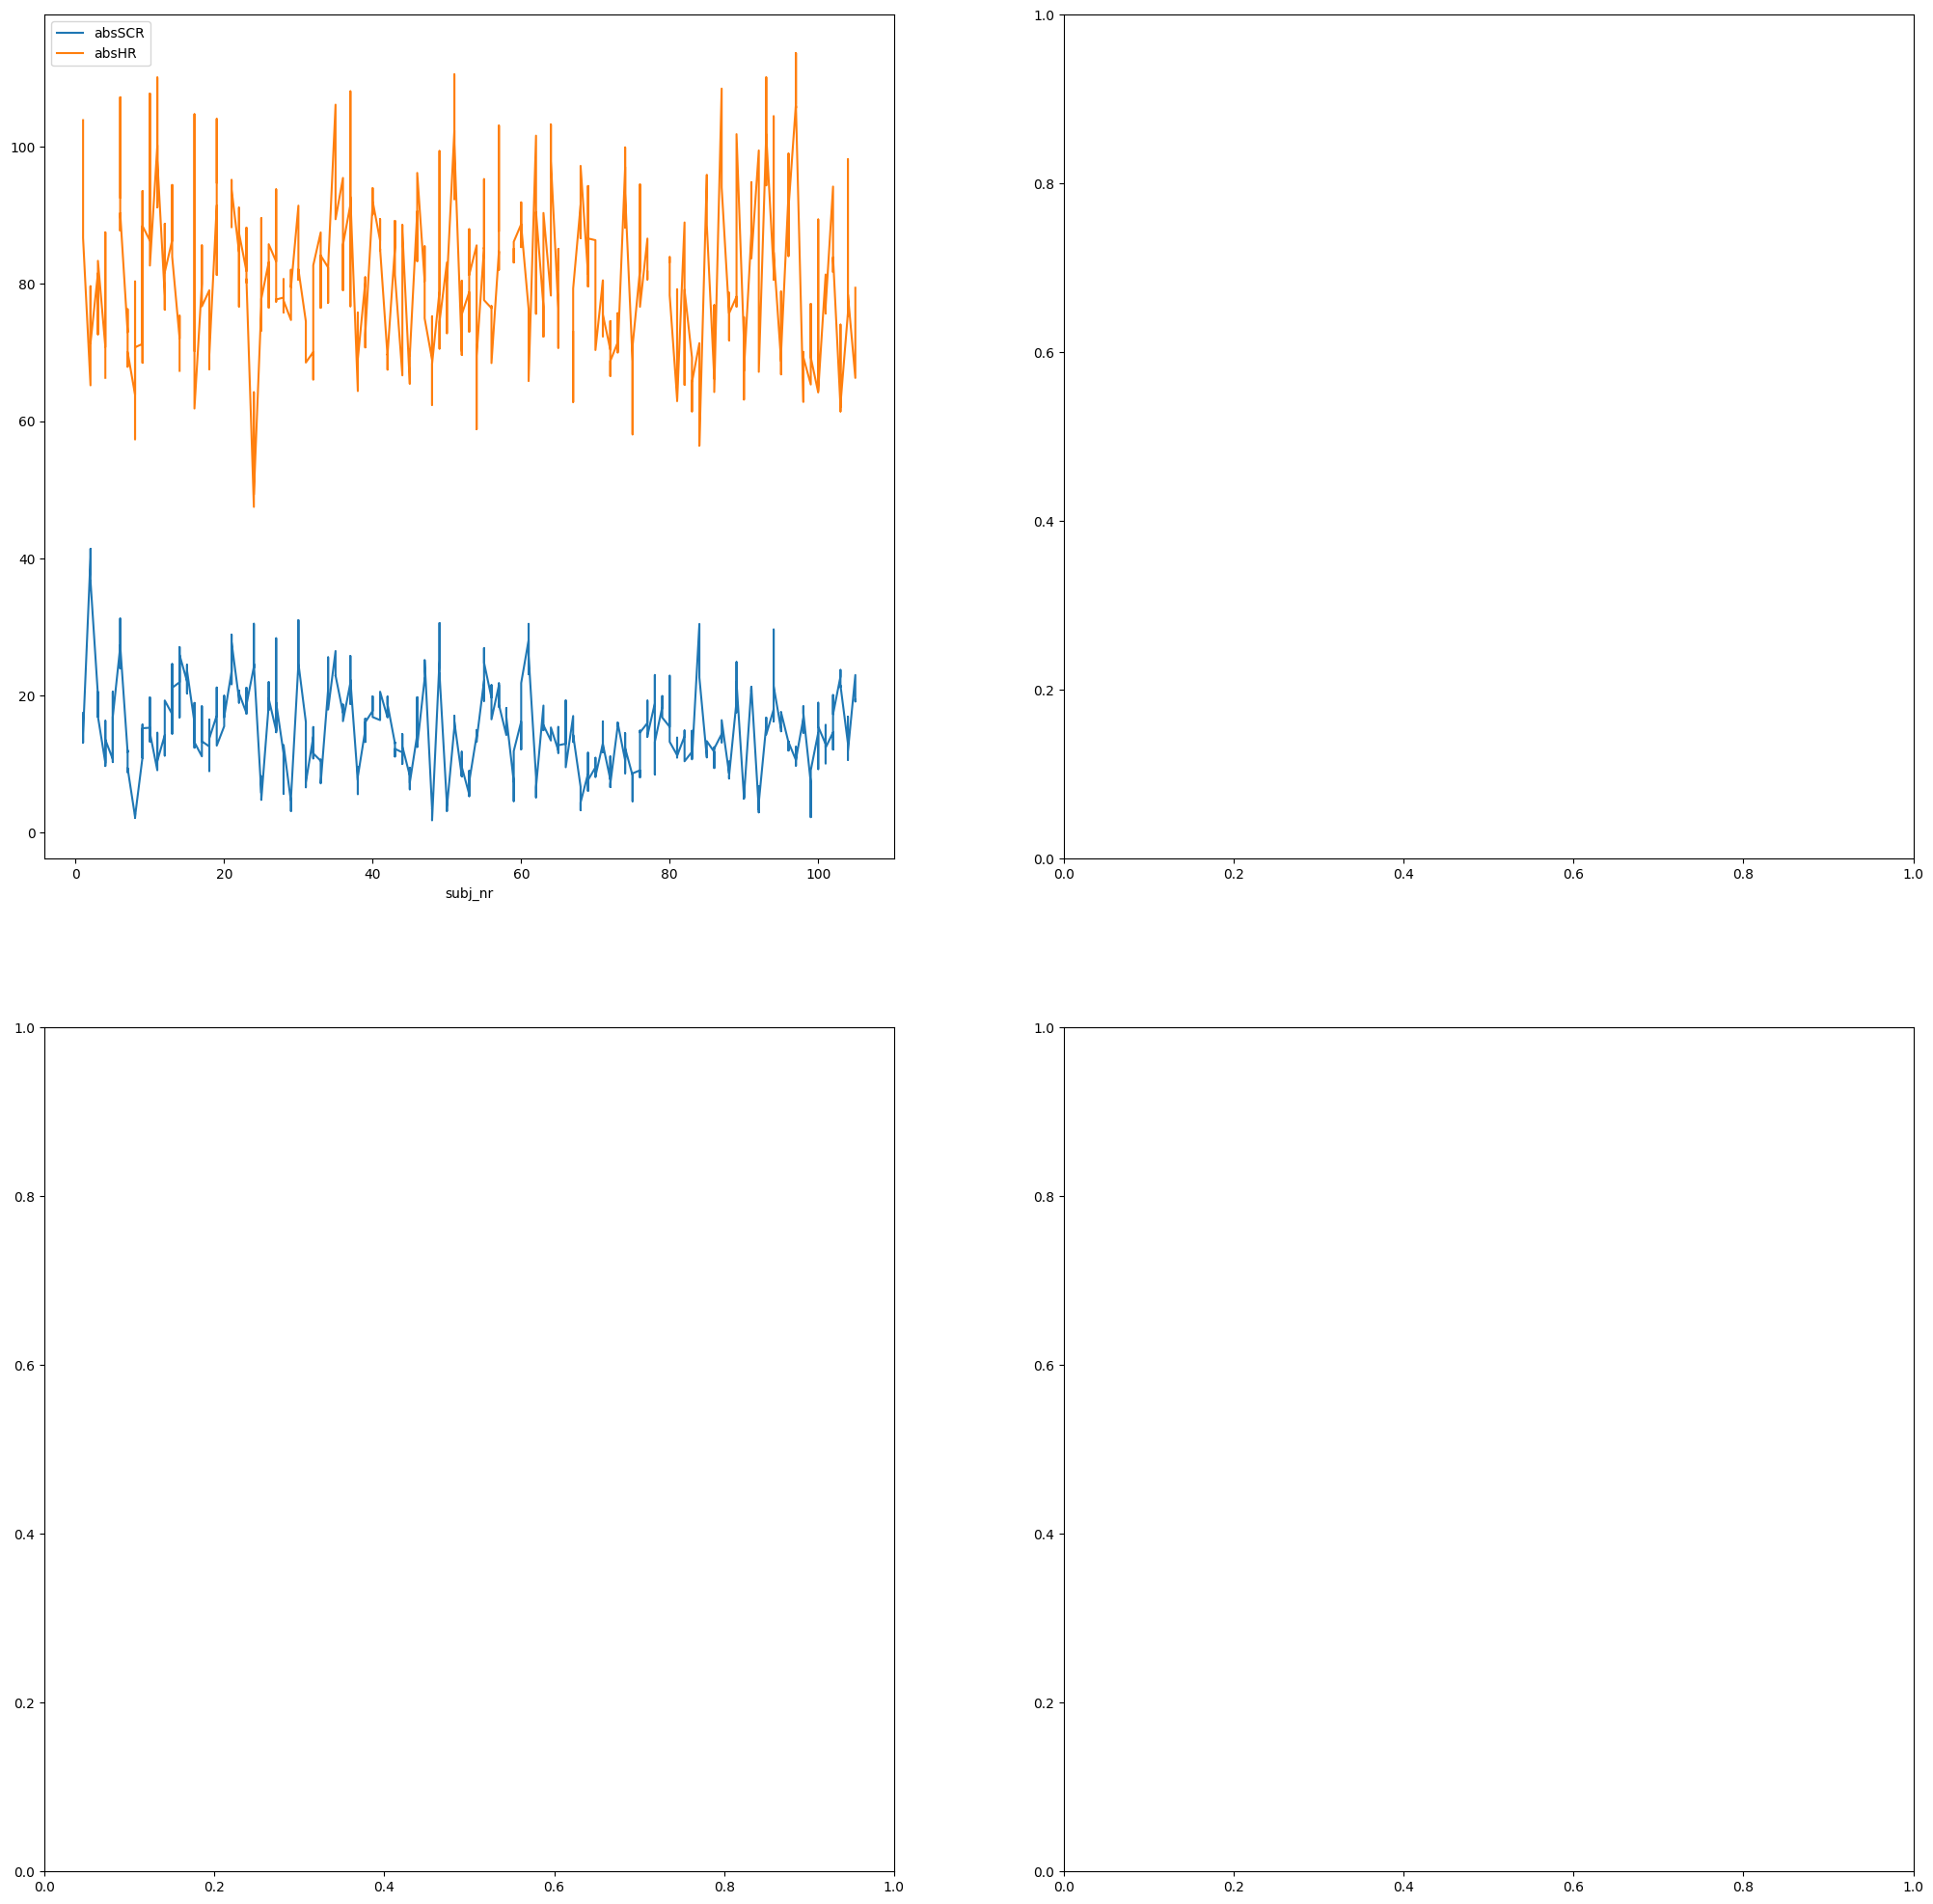

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 25), sharey=False)
trial1.plot(x = 'subj_nr', y  = 'absSCR', ax = ax[0, 0])
trial1.plot(x = 'subj_nr', y  = 'absHR', ax = ax[0, 0])

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

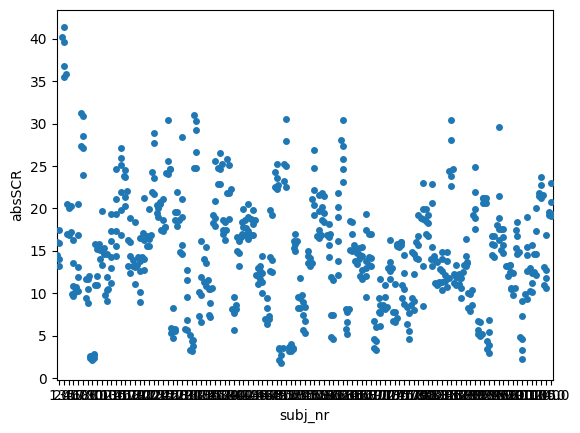

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 25), sharey=False)
ax = sns.swarmplot (x = 'subj_nr', y  = 'absSCR', data = trial1)
#ax = sns.swarmplot (x = 'subj_nr', y  = 'absHR', ax = ax[0, 0], data = trial1)

To run a factorial ANOVA.

In [6]:
# Load data into a Pandas dataframe
socialgood = pd.read_csv('socialgood.csv')
socialgood.head()
# socialgood.info()
# print(socialgood.gender)
print(type(socialgood))

<class 'pandas.core.frame.DataFrame'>


In [80]:
print(socialgood)
socialgood1 = socialgood.rename(columns = {'contr':'Contribution'})
print(socialgood1.Contribution)

      subj_nr  group  subj_group  block  trial_nr threat_cond  order  contr  \
0         1.0   10.0         1.0    1.0       1.0        safe    1.0    1.0   
1         1.0   10.0         1.0    1.0       1.0        mild    3.0    1.0   
2         1.0   10.0         1.0    1.0       1.0      threat    2.0    1.0   
3         1.0   10.0         1.0    1.0       2.0        safe    1.0    1.0   
4         1.0   10.0         1.0    1.0       2.0        mild    3.0    1.0   
...       ...    ...         ...    ...       ...         ...    ...    ...   
6296    105.0   47.0         3.0    2.0       9.0      threat    6.0    0.0   
6297    105.0   47.0         3.0    2.0      10.0        safe    4.0    5.0   
6298    105.0   47.0         3.0    2.0      10.0        mild    5.0    5.0   
6299    105.0   47.0         3.0    2.0      10.0      threat    6.0    5.0   
6300      NaN    NaN         NaN    NaN       NaN         NaN    NaN    NaN   

      active_contr  trials_total  ...  real  shock_

In [81]:
# socialgood1['gender']= socialgood1['gender'].replace(['1'],'female')
# socialgood1['gender']= socialgood1['gender'].replace(['2'],'male')
# socialgood1['gender']= socialgood1['gender'].replace(['NaN'],'other')
# print(socialgood1.gender)

In [83]:
for i in range(len(socialgood1)):
    valueG = socialgood1.loc[i, 'gender']
    if valueG in ['female', 'male', 'other']:
        continue
    if valueG ==1:
        socialgood1.loc[i,'gender']= 'female'
    elif valueG ==2:
        socialgood1.loc[i, 'gender']= 'male'
    else:
        socialgood1.loc[i, 'gender']= 'other'

print(socialgood1.gender)
print(socialgood1['gender'].value_counts())


0       female
1       female
2       female
3       female
4       female
         ...  
6296    female
6297    female
6298    female
6299    female
6300     other
Name: gender, Length: 6301, dtype: object
male      4020
female    2160
other      121
Name: gender, dtype: int64


In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

0       female
1       female
2       female
3       female
4       female
         ...  
6296    female
6297    female
6298    female
6299    female
6300     other
Name: gender, Length: 6301, dtype: object


,subj_nr,group,subj_group,block,trial_nr,threat_cond,order,Contribution,active_contr,trials_total,...,real,shock_intens,mild_intens,identity,confidentiality,observed,motivation,prior_experience,prior_knowledge,knowing_eachother
180,4.0,11.0,1.0,1.0,1.0,safe,2.0,5.0,1.0,11.0,...,5.0,5.0,3.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
181,4.0,11.0,1.0,1.0,1.0,mild,1.0,5.0,1.0,1.0,...,5.0,5.0,3.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
182,4.0,11.0,1.0,1.0,1.0,threat,4.0,5.0,1.0,31.0,...,5.0,5.0,3.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
183,4.0,11.0,1.0,1.0,2.0,safe,2.0,6.0,1.0,12.0,...,5.0,5.0,3.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
184,4.0,11.0,1.0,1.0,2.0,mild,1.0,5.0,1.0,2.0,...,5.0,5.0,3.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,104.0,47.0,2.0,2.0,9.0,mild,5.0,8.0,1.0,49.0,...,4.0,3.0,1.0,5.0,5.0,4.0,2.0,2.0,1.0,1.0
6236,104.0,47.0,2.0,2.0,9.0,threat,6.0,6.0,1.0,59.0,...,4.0,3.0,1.0,5.0,5.0,4.0,2.0,2.0,1.0,1.0
6237,104.0,47.0,2.0,2.0,10.0,safe,4.0,2.0,1.0,40.0,...,4.0,3.0,1.0,5.0,5.0,4.0,2.0,2.0,1.0,1.0
6238,104.0,47.0,2.0,2.0,10.0,mild,5.0,0.0,1.0,50.0,...,4.0,3.0,1.0,5.0,5.0,4.0,2.0,2.0,1.0,1.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_8912\2736576290.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(socialgood1[socialgood1['gender'] == 'male']['Contribution'], shade=True, label='male', ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8912\2736576290.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(socialgood1[socialgood1['gender'] == 'female']['Contribution'], shade=True, label='female', ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8912\2736576290.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(socialgood1[socialgood1['gender'] == 'other']['Contribution'], shade=True, label='other', a

                                sum_sq      df          F        PR(>F)
C(gender)                  1419.816033     2.0  57.081378  2.706018e-25
C(threat_cond)               52.233465     2.0   2.099961  1.225471e-01
C(gender):C(threat_cond)     16.766424     4.0   0.337033  8.531457e-01
Residual                  78165.104775  6285.0        NaN           NaN


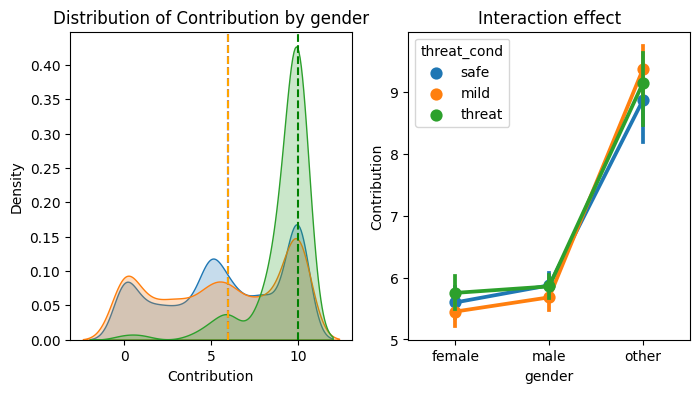

In [85]:
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# Plot the distributions of the two groups
print(socialgood1['gender'])
display(socialgood1[socialgood1['gender'] == 'male'])
sns.kdeplot(socialgood1[socialgood1['gender'] == 'male']['Contribution'], shade=True, label='male', ax=axes[0])
sns.kdeplot(socialgood1[socialgood1['gender'] == 'female']['Contribution'], shade=True, label='female', ax=axes[0])
sns.kdeplot(socialgood1[socialgood1['gender'] == 'other']['Contribution'], shade=True, label='other', ax=axes[0])
# Add vertical lines for the median values of each group
axes[0].axvline(socialgood1[socialgood1['gender'] == 'male']['Contribution'].median(), color='blue', linestyle='dashed')
axes[0].axvline(socialgood1[socialgood1['gender'] == 'female']['Contribution'].median(), color='orange', linestyle='dashed')
axes[0].axvline(socialgood1[socialgood1['gender'] == 'other']['Contribution'].median(), color='green', linestyle='dashed')
axes[0].set_title('Distribution of Contribution by gender')

# Plot the interaction effect
sns.pointplot(x='gender', y='Contribution', hue='threat_cond', data=socialgood1, ax=axes[1])
axes[1].set_title('Interaction effect')

# Run a two-way factorial ANOVA on the contribution socialgood1 based on gender
model = ols('Contribution ~ C(gender) * C(threat_cond)', data=socialgood1).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)



This is a two-way factorial ANOVA with gender and threat condition as the factors. The results of the ANOVA are summarized in the table printed by the code.

The main effect of gender is significant (F(2, 6285) = 57.08, p < 0.001), indicating that there are significant differences in contributions between different genders.

The main effect of threat condition is not significant (F(2, 6285) = 2.10, p = 0.123), indicating that there is no significant difference in contributions between different threat conditions.

The interaction effect between gender and threat condition is not significant (F(4, 6285) = 0.34, p = 0.853), indicating that the effect of gender on contributions is consistent across different threat conditions.

The residual term represents the unexplained variance in the model.

In summary, the results suggest that there are significant differences in contributions between different genders, but no significant differences between different threat conditions, and the effect of gender on contributions is consistent across different threat conditions.

                            OLS Regression Results                            
Dep. Variable:                  contr   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     50.53
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -14622.
No. Observations:                5868   AIC:                         2.935e+04
Df Residuals:                    5813   BIC:                         2.972e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

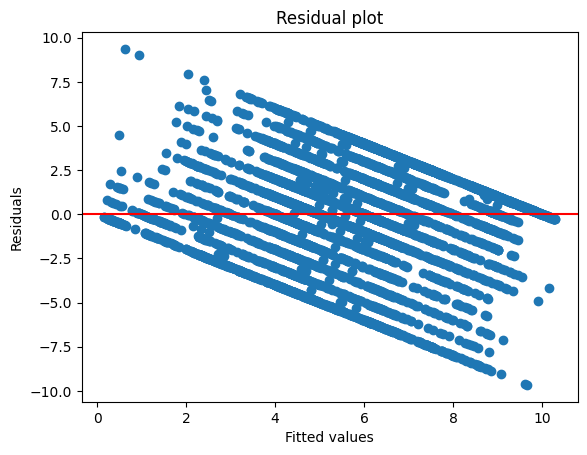

In [56]:
# regression

# Specify the predictor and outcome variables

dt = pd.read_csv('socialgood.csv')


dt.dropna(subset=['svo_angle','emotional_distress_score','contr','gender','field_study','age'],inplace=True)


# X = dt[['svo_angle', 'emotional_distress_score', 'gender', 'age','field_study', 'threat_cond']]
# y = dt['contr']

# Add a constant term to the predictor variables to estimate the intercept
# X = sm.add_constant(X)

# Fit the linear regression model
# model = sm.OLS(y, X).fit()

model = ols(formula='contr ~ svo_angle + emotional_distress_score  + gender + age + field_study + threat_cond  + absSCR + absHR', data=dt).fit()

# Print the regression summary
print(model.summary())

residuals = model.resid
plt.scatter(model.predict(), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

ValueError: operands could not be broadcast together with shapes (6294,) (5868,) 

In [60]:
import statsmodels.api as sm
print(sm.__version__)

0.13.5


In [65]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.regression.linear_model import OLS
dt = dt.dropna(subset=['svo_angle', 'emotional_distress_score', 'contr', 'gender', 'field_study', 'age'])


# Fit the restricted model
restricted_formula = 'contr ~ svo_angle + emotional_distress_score + gender + age + field_study + threat_cond'
restricted_model = OLS.from_formula(restricted_formula, data=dt).fit()

# Fit the unrestricted model
unrestricted_formula = 'contr ~ svo_angle + emotional_distress_score + gender + age + field_study + threat_cond + absSCR + absHR'
unrestricted_model = OLS.from_formula(unrestricted_formula, data=dt).fit()

# Compute the residuals for the restricted and unrestricted models
restricted_residuals = restricted_model.resid
unrestricted_residuals = unrestricted_model.resid

# Compute the test statistic and p-value using the White test
test_stat, p_value, f_stat, f_p_value = het_white(unrestricted_residuals, restricted_model.model.exog)

# Print the results
print('Durbin-Wu-Hausman test:')
print('Test statistic: ', test_stat)
print('p-value: ', p_value)


ValueError: resid is required to have shape (6294, 1) but has shape (5868, 1)